ex_lampe_incandescente

In [35]:
import sympy as sp
from sympy import init_printing
init_printing() 

R,R0,alpha,T,T0,k,Ta,R,U,P=sp.symbols("R,R0,alpha,T,T0,k,Ta,R,U,P", positive=True)

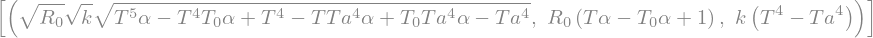

In [38]:
eq1=sp.Eq(R,R0*(1+alpha*(T-T0)))
eq2=sp.Eq(P,U**2/R)
eq3=sp.Eq(P,k*(T**4-Ta**4))
SOL=sp.solve([eq1,eq2,eq3],[U,R,P])
SOL

In [40]:
# 1. Expression de U comme fonction de T
U=sp.factor(SOL[0][0],T)
U

In [41]:
# 2. Valeur numérique et tension pour T=2000K
valeurs={alpha:0.004, R0:484, T0:2000, Ta:300, k:6.253e-12}
U.subs(valeurs).subs(T,2000).evalf()

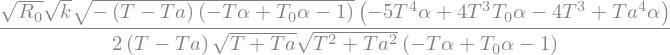

In [43]:
# 3. Linéarisation autour du point T=2000
DU=U.diff(T)
sp.factor(DU)

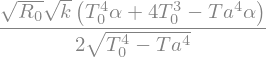

In [46]:
# 3.2 On évalue en T=T0, ce qui permet de simplifier un peu...
sp.simplify(DU.subs(T,T0))

In [44]:
ST=DU.subs(valeurs).subs(T,2000).evalf()
ST

In [15]:
# 4. Expression de la tension linéarisée et inversion de la caractéristique pour trouver T
Ulin,U0=sp.symbols('Ulin,U0')
Tlin=sp.solve(sp.Eq(Ulin,U0+ST*(T-T0)),T)
Tlin[0]
#sp.simplify(Tlin[0])

In [27]:
SU=Tlin[0].coeff(Ulin)

In [28]:
# Intensité lumineuse émise par le filament
Ii,Ii0,eta,P0=sp.symbols('Ii,Ii0,eta,P0')
valeurs2={P0:100, eta:0.05}

In [29]:
# 5.1 Linéarisation autour de T0
Ii=eta*P0*T**2/T0**2
SI=Ii.diff(T).subs(T,T0).subs(valeurs2).subs(valeurs).evalf()
SI

In [32]:
# 5.2 Variation de l'intensité comme fonction de U
Ul=sp.symbols('Ul')
Ilin=(SI*(T-T0)+eta*P0).subs(T,T0+SU*(Ul-U0))
Ilin

In [52]:
Siu=Ilin.coeff(Ul)
Siu

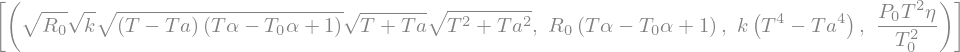

In [47]:
eq1=sp.Eq(R,R0*(1+alpha*(T-T0)))
eq2=sp.Eq(P,U**2/R)
eq3=sp.Eq(P,k*(T**4-Ta**4))
eq4=sp.Eq(Ii,eta*P0*T**2/T0**2)
SOL=sp.solve([eq1,eq2,eq3,eq4],[U,R,P,Ii])
SOL

In [50]:
sp.solve(sp.Eq(U,SOL[0][0]),T)